In [ ]:
### Dataset is taken from Kaggle 
### https://www.kaggle.com/datasets/timmofeyy/-metals-price-changes-within-last-30-years

In [4]:
%pip install --user --upgrade matplotlib 

  Using cached https://files.pythonhosted.org/packages/df/3f/6093a23565d0f50ce433f56223fcc34af6c912cd4331dc582ba29d9b5a17/matplotlib-3.5.3-cp37-cp37m-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [9]:
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import numpy as np
import dateutil.parser
from matplotlib import dates
from matplotlib import pyplot as plt
import datetime as dt
from datetime import timedelta

df = pd.read_csv('commodity_futures.csv', parse_dates=True)

df.set_index('Date', inplace=True)
df.dropna(inplace=True)
df.head(10)

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-03,14.017,466.1,65.47,62.80,581.00,208.75,1.7590,7.455,627.75,89.225,...,1404.25,208.09,13505.0,348.75,11.53,188.88,92.85,68.225,381.75,52.55
2005-10-04,14.224,466.1,63.90,61.22,562.50,205.75,1.7660,7.425,607.75,90.950,...,1415.50,204.97,13205.0,347.25,11.43,184.53,92.70,68.025,379.00,51.55
2005-10-05,14.183,466.1,62.79,60.12,563.50,204.75,1.7865,7.478,614.50,90.300,...,1447.75,201.48,13275.0,345.00,11.44,176.50,93.70,68.200,378.00,52.45
2005-10-06,13.375,471.9,61.36,58.37,564.25,204.25,1.7830,7.595,592.75,89.725,...,1446.50,195.07,13215.0,345.25,11.26,172.00,93.50,67.675,381.75,52.75
2005-10-07,13.226,474.7,61.84,59.21,564.25,202.50,1.8085,7.770,595.00,90.250,...,1468.00,196.01,13141.0,338.00,11.37,174.00,94.85,68.550,376.75,52.20
2005-10-10,12.975,475.1,61.80,58.78,555.50,202.00,1.8060,7.845,593.75,90.800,...,1465.75,197.18,12738.0,339.75,11.66,173.00,98.90,68.325,382.50,55.66
2005-10-11,13.519,477.1,63.53,60.08,563.50,202.50,1.8350,7.875,604.75,90.775,...,1483.75,201.79,12766.0,342.75,11.84,177.00,100.75,67.675,382.75,55.17
2005-10-12,13.524,473.9,64.12,60.57,589.00,205.75,1.7935,7.838,604.75,90.775,...,1466.25,201.57,12635.0,347.50,11.73,177.57,101.30,67.275,388.25,55.90
2005-10-13,13.103,471.1,63.08,60.14,588.25,203.50,1.7650,7.735,605.75,91.450,...,1459.75,199.69,12158.0,343.50,11.69,172.86,100.35,67.350,388.25,56.18


In [10]:
df.describe()

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
count,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,...,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000
mean,4.379202,1278.937828,71.974486,76.945321,1096.753676,454.699491,3.125552,19.431071,678.845928,114.102743,...,2428.679740,221.544629,17973.289887,594.815667,16.427654,211.257281,145.569819,75.663173,615.973982,77.432109
std,2.308797,372.475941,22.733744,24.983669,279.978843,147.560567,0.693514,6.769539,224.145744,20.707687,...,654.248881,70.758027,7645.781604,165.098847,4.956091,64.087443,44.288896,16.994343,182.940816,25.771092
min,1.482000,457.900000,-37.630000,19.330000,527.250000,186.250000,1.247500,7.425000,190.750000,73.850000,...,1047.000000,61.040000,7562.000000,293.000000,8.450000,41.180000,86.650000,37.325000,347.500000,39.140000
25%,2.791500,1086.825000,53.620000,57.925000,899.437500,358.250000,2.650375,14.962250,521.687500,95.575000,...,1956.125000,170.430000,12688.875000,477.000000,12.530000,160.427500,114.700000,62.718750,470.750000,62.007500
50%,3.699500,1276.900000,69.290000,71.870000,1020.500000,387.750000,3.116750,17.427000,620.000000,115.175000,...,2297.500000,203.140000,16223.500000,543.000000,15.580000,204.075000,131.200000,72.875000,561.000000,71.550000
75%,5.132750,1583.425000,91.332500,101.715000,1343.812500,569.062500,3.553000,22.813250,888.000000,126.525000,...,2825.137500,287.125000,21022.250000,694.750000,19.002500,264.517500,166.325000,86.425000,737.062500,84.972500
max,15.378000,2051.500000,145.290000,146.080000,1771.000000,831.250000,4.929000,48.584000,1522.500000,171.000000,...,4594.000000,513.540000,53750.000000,1425.250000,35.310000,427.620000,304.900000,133.875000,1367.750000,215.150000


In [11]:
df.index.inferred_type == "datetime64"

False

In [12]:
df.index = pd.to_datetime(df.index)

In [13]:
df.index.inferred_type == "datetime64"

True

In [14]:
# X axis

date1 = dt.datetime(2009, 1, 1)
date2 = dt.datetime(2021, 1, 1)
mask = (df.index > date1) & (df.index < date2)
df0 = df.loc[mask]
df0.head()





,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-02,5.971,879.5,46.34,46.91,970.00,412.25,1.4610,11.490,427.75,87.100,...,1258.75,148.03,13130.0,611.00,11.85,111.05,110.90,63.850,633.50,48.91
2009-01-05,6.072,857.8,48.81,49.62,983.75,411.25,1.4590,11.270,478.75,87.550,...,1278.75,157.63,12772.0,616.75,11.82,118.24,107.70,62.675,642.25,48.31
2009-01-06,5.983,866.0,48.58,50.53,1014.25,427.50,1.5830,11.445,514.50,88.550,...,1298.25,162.63,13175.0,643.50,12.27,118.92,116.10,63.950,670.00,50.28
2009-01-07,5.872,841.7,42.63,45.86,990.00,416.50,1.5115,11.105,500.50,85.775,...,1269.00,154.31,12227.0,613.25,11.98,107.64,114.20,63.550,637.00,49.61
2009-01-08,5.583,854.5,41.70,44.67,989.00,406.75,1.4790,11.097,478.25,83.150,...,1213.75,151.96,11472.0,612.50,12.03,108.82,113.45,62.425,633.25,50.42


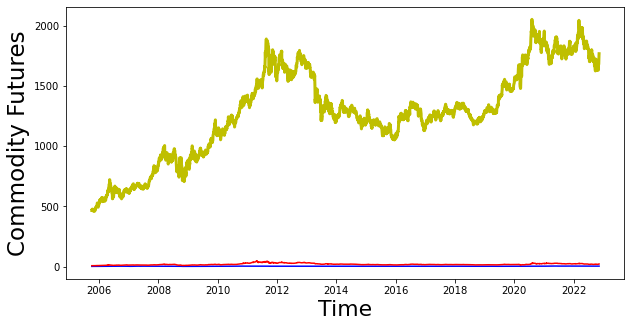

In [20]:
##All 
fig, ax = plt.subplots(figsize = (10, 5), facecolor=None)
#plt.title('Title')

X = df.index
ax.plot(X, df['GOLD'], color='y', linewidth=3)
ax.plot(X, df['COPPER'], color='b')
ax.plot(X, df['SILVER'], color='r')
#ax.plot(X, df['NICKEL'], color='g')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Time', fontsize=22)
plt.ylabel('Commodity Futures', fontsize=23)
#plt.title('Figure Title', fontsize=24)
#plt.legend(fontsize=18)
#plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), prop={'size':14}, fancybox=True, shadow=True)
#plt.tight_layout()
#plt.savefig('MagmaticFluidProductionRate_C8-C10')
plt.show()

In [16]:
# Set X axis limits my masking 

date1 = dt.datetime(2016, 1, 1)
date2 = dt.datetime(2022, 11, 7)
mask = (df.index > date1) & (df.index < date2)
df_cu = df.loc[mask]
df_cu.tail(100)


,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-20,6.944,1835.6,109.56,114.13,1702.00,784.50,4.0135,21.587,1317.00,138.025,...,3533.75,433.98,25685.0,1034.25,18.60,379.30,227.65,111.000,1105.00,143.45
2022-06-21,6.808,1834.6,110.65,114.65,1681.00,760.75,4.0390,21.768,1320.25,137.825,...,3618.00,435.84,25901.0,975.25,18.66,379.45,233.10,112.725,1041.25,143.51
2022-06-22,6.858,1834.3,106.19,111.74,1652.75,768.00,3.9440,21.421,1284.25,136.125,...,3571.50,440.46,24399.0,976.50,18.45,383.41,238.60,111.850,1039.25,143.32
2022-06-23,6.239,1825.7,104.27,110.05,1593.25,746.75,3.7390,21.042,1290.50,135.250,...,3539.50,433.79,23996.0,937.25,18.38,376.56,232.45,108.550,1005.00,136.32
2022-06-24,6.220,1826.5,107.62,113.12,1610.75,750.25,3.7405,21.125,1302.00,135.350,...,3400.00,436.29,22360.0,923.75,18.37,388.48,226.60,110.925,992.50,103.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,6.355,1640.7,86.53,94.83,1407.00,691.50,3.3750,19.119,1100.25,146.775,...,2725.50,419.09,21717.0,882.25,17.97,281.07,177.70,84.925,978.75,72.00
2022-11-01,5.714,1649.7,88.37,94.65,1435.75,697.75,3.4725,19.667,1047.50,151.950,...,2767.50,362.11,23522.0,902.50,18.43,259.45,174.60,85.200,990.00,75.00
2022-11-02,6.268,1650.0,90.00,96.16,1440.00,687.50,3.4685,19.594,1054.25,151.400,...,2765.00,367.74,24066.0,846.00,18.47,269.72,182.15,83.300,940.25,79.00


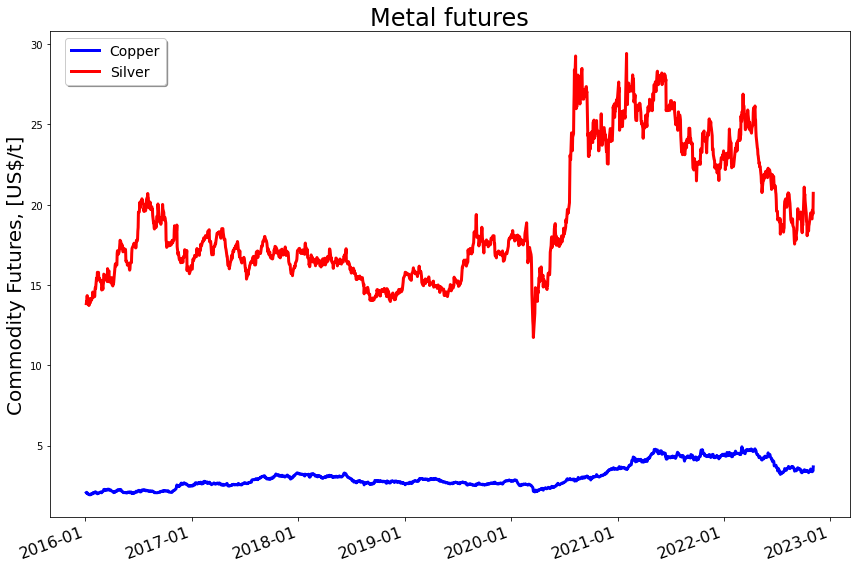

In [39]:
fig, ax = plt.subplots(figsize = (12, 8), facecolor=None)
#plt.title('Title')

X = df_cu.index
#ax.plot(X, df_cu['GOLD'], color='y', linewidth=3)
ax.plot(X, df_cu['COPPER'], color='b', linewidth=3, label = 'Copper')
ax.plot(X, df_cu['SILVER'], color='r', linewidth=3, label = 'Silver')
#ax.plot(X, df_cu['ZINC'], color='g', label = 'Zinc')
#ax.plot(X, df_cu['NICKEL'], color='g')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


plt.title("Metal futures", fontsize=24)
#ax.set_xlim(['2010-1-1', '2022-1-1'])


#plt.xlabel('Time', fontsize=20)
plt.setp(ax.get_xticklabels(), rotation=20, fontsize=16, ha="right")
plt.ylabel('Commodity Futures, [US$/t]', fontsize=20)
plt.legend(fontsize=18)
plt.legend(loc='upper left', bbox_to_anchor=(0.01, 1.0), prop={'size':14}, fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig('Cu Ag Price')
plt.show()

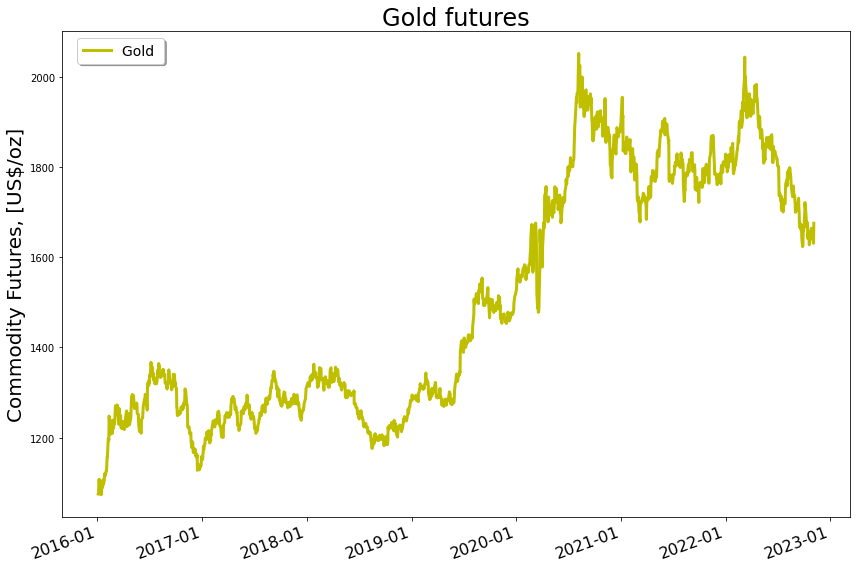

In [38]:
fig, ax = plt.subplots(figsize = (12, 8), facecolor=None)
#plt.title('Title')

X = df_cu.index
ax.plot(X, df_cu['GOLD'], color='y', linewidth=3 , label = 'Gold ')
#ax.plot(X, df_cu['COPPER'], color='b', label = 'Copper')
#ax.plot(X, df_cu['SILVER'], color='r', label = 'Silver')
#ax.plot(X, df_cu['ZINC'], color='c', label = 'Zinc')
#ax.plot(X, df_cu['NICKEL'], color='g', label = 'Nickel')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


plt.title("Gold futures", fontsize=24)
#ax.set_xlim(['2010-1-1', '2022-1-1'])


#plt.xlabel('Time', fontsize=20)
plt.setp(ax.get_xticklabels(), rotation=20, fontsize=16, ha="right")
plt.ylabel('Commodity Futures, [US$/oz]', fontsize=20)
plt.legend(fontsize=18)
plt.legend(loc='upper left', bbox_to_anchor=(0.01, 1.0), prop={'size':14}, fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig('AU Price')
plt.show()

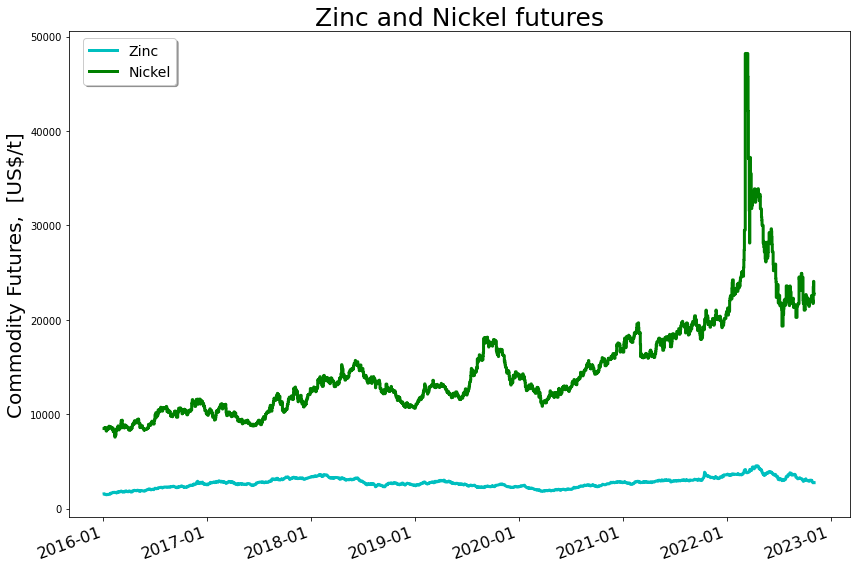

In [37]:
fig, ax = plt.subplots(figsize = (12, 8), facecolor=None)
#plt.title('Title')

X = df_cu.index
#ax.plot(X, df_cu['GOLD'], color='y', linewidth=3 , label = 'Gold ')
#ax.plot(X, df_cu['COPPER'], color='b', label = 'Copper')
#ax.plot(X, df_cu['SILVER'], color='r', label = 'Silver')
ax.plot(X, df_cu['ZINC'], color='c',  linewidth=3, label = 'Zinc')
ax.plot(X, df_cu['NICKEL'], color='g',  linewidth=3, drawstyle='steps-post', label = 'Nickel')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


plt.title("Zinc and Nickel futures", fontsize=25)
#ax.set_xlim(['2010-1-1', '2022-1-1'])


#plt.xlabel('Time', fontsize=20)
plt.setp(ax.get_xticklabels(), rotation=20, fontsize=16, ha="right")
plt.ylabel('Commodity Futures,  [US$/t]', fontsize=20)
plt.legend(fontsize=18)
plt.legend(loc='upper left', bbox_to_anchor=(0.01, 1.0), prop={'size':14}, fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig('Zn NI Price')
plt.show()

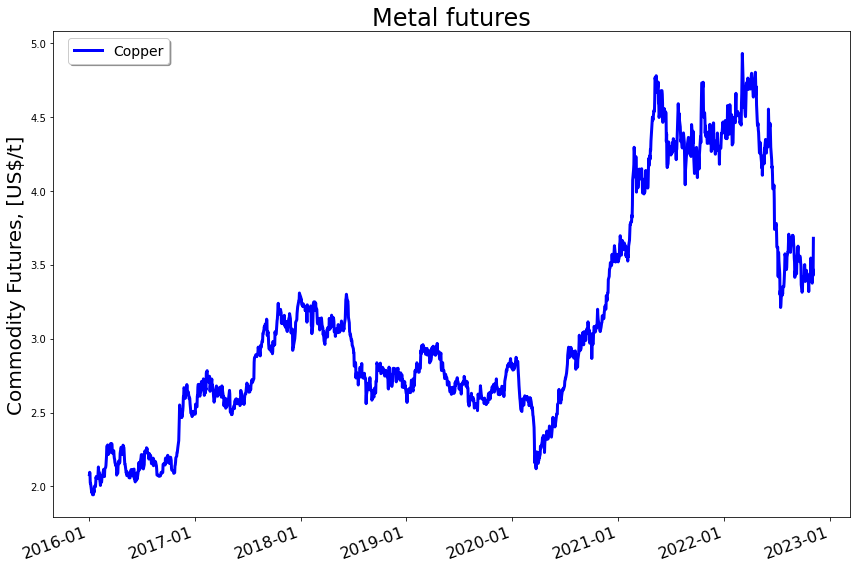

In [40]:
fig, ax = plt.subplots(figsize = (12, 8), facecolor=None)
#plt.title('Title')

X = df_cu.index
#ax.plot(X, df_cu['GOLD'], color='y', linewidth=3)
ax.plot(X, df_cu['COPPER'], color='b', linewidth=3, label = 'Copper')
#ax.plot(X, df_cu['SILVER'], color='r', linewidth=3, label = 'Silver')
#ax.plot(X, df_cu['ZINC'], color='g', label = 'Zinc')
#ax.plot(X, df_cu['NICKEL'], color='g')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


plt.title("Metal futures", fontsize=24)
#ax.set_xlim(['2010-1-1', '2022-1-1'])


#plt.xlabel('Time', fontsize=20)
plt.setp(ax.get_xticklabels(), rotation=20, fontsize=16, ha="right")
plt.ylabel('Commodity Futures, [US$/t]', fontsize=20)
plt.legend(fontsize=18)
plt.legend(loc='upper left', bbox_to_anchor=(0.01, 1.0), prop={'size':14}, fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig('Cu Price')
plt.show()